In [219]:
import pandas as pd
import numpy as np
import math as m

In [220]:
path="D:/Python/Machine Hack/Used Car/Participants_Data_Used_Cars/Data_Train.xlsx"

In [221]:
train_data=pd.read_excel(path)

In [222]:
train_data.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [223]:
test_data= pd.read_excel("D:/Python/Machine Hack/Used Car/Participants_Data_Used_Cars/Data_Test.xlsx")
Sample_submission= pd.read_excel("D:/Python/Machine Hack/Used Car/Participants_Data_Used_Cars/Sample_submission.xlsx")

In [224]:
test_data.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0,NaN
6,Toyota Fortuner 4x2 AT TRD Sportivo,Pune,2015,59000,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.7 bhp,7.0,NaN
7,Hyundai EON Era Plus,Jaipur,2013,65000,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,NaN
8,Honda City 1.5 S MT,Mumbai,2011,66000,Petrol,Manual,Second,17.0 kmpl,1497 CC,118 bhp,5.0,NaN
9,Mahindra XUV500 W6 2WD,Coimbatore,2015,54684,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,NaN


In [225]:
test_data["Price"]=0

In [226]:
test_data["temp"]="test"
train_data["temp"]="train"
combi=pd.concat([train_data,test_data],axis=0)

In [227]:
print(combi.dtypes)
combi.describe()

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
temp                  object
dtype: object


,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7.253000e+03,7200.000000,7253.000000
mean,2013.365366,5.869906e+04,5.279722,7.866665
std,3.254421,8.442772e+04,0.811660,10.796286
min,1996.000000,1.710000e+02,0.000000,0.000000
25%,2011.000000,3.400000e+04,5.000000,2.290000
50%,2014.000000,5.341600e+04,5.000000,4.650000
75%,2016.000000,7.300000e+04,5.000000,8.400000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [228]:
combi.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
temp                  object
dtype: object

In [229]:
combi["Mileage"]=pd.to_numeric(combi["Mileage"].str.replace("[^0-9.]","",regex=True))
combi["Engine"]=pd.to_numeric(combi["Engine"].str.replace("[^0-9.]","",regex=True))
combi["Power"]=pd.to_numeric(combi["Power"].str.replace("[^0-9.]","",regex=True))

In [230]:
categorical_columns= [x for x in combi.dtypes.index if combi.dtypes[x]=="object"]
cat_columns= [i for i in categorical_columns if i not in ["New_Price","temp","Name"]]
for i in cat_columns:
    print("Frequency of categories %s"%i)
    print(combi[i].value_counts(dropna=False))

Frequency of categories Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
Frequency of categories Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
Frequency of categories Transmission
Manual       5204
Automatic    2049
Name: Transmission, dtype: int64
Frequency of categories Owner_Type
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64


In [231]:
combi.apply(lambda x:sum(x.isnull()))
#combi.isnull().sum(axis=0)

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                   0
temp                    0
dtype: int64

In [232]:
## There is so many missing values in new price, will not considerng this variable for the analysis.

In [233]:
## Transforming and encoding categorial variable based on the importance.
## As per business understanding,we know order of resale value based on fuel type. Diesel car is more costly then petrol, petrol
###is more costly then CNG.


In [234]:
combi["Fuel_Type_Num"]= combi["Fuel_Type"].map({"Electric":1,"LPG":2,"CNG":3,"Petrol":4,"Diesel":5})

In [235]:
## Based on owner_type we know first hand car will have higher price. We understand the order of resale value based on owner_type
## Using Different method for encoding
combi["Owner_Type_Num"]= np.where(combi["Owner_Type"]=="Fourth & Above",1,2)
combi.loc[combi["Owner_Type"]=="Second","Owner_Type_Num"]=3
combi.loc[combi["Owner_Type"]=="First","Owner_Type_Num"]=4

In [236]:
#### Automatic car resale price will be higher than manual

combi["Transmission_Num"]= np.where(combi["Transmission"]=="Manual",1,2)

In [237]:
combi["Years_Usage"]= 2019-combi["Year"]

In [238]:
Tier1_City = ["Mumbai","Delhi","Bangalore","Chennai","Kolkata","Hyderabad"]

In [239]:
combi["Tier_wise_class"]= np.where(combi["Location"].isin(Tier1_City),2,1)

In [240]:
combi

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,temp,Fuel_Type_Num,Owner_Type_Num,Transmission_Num,Years_Usage,Tier_wise_class
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,train,3,4,1,9,2
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,train,5,4,1,4,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,train,4,4,1,8,2
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,train,5,4,1,7,2
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,train,5,3,2,6,1
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,NaN,2.35,train,2,4,1,7,2
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,3.50,train,5,4,1,6,1
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,21 Lakh,17.50,train,5,4,2,3,2
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.20,train,5,4,1,6,1
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,NaN,1.95,train,5,3,1,7,2


In [241]:
combi["Brand_Name"]= combi["Name"].apply(lambda x:x[0:5])

In [242]:
combi

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,temp,Fuel_Type_Num,Owner_Type_Num,Transmission_Num,Years_Usage,Tier_wise_class,Brand_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,train,3,4,1,9,2,Marut
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,train,5,4,1,4,1,Hyund
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,train,4,4,1,8,2,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,train,5,4,1,7,2,Marut
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,train,5,3,2,6,1,Audi
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,NaN,2.35,train,2,4,1,7,2,Hyund
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,3.50,train,5,4,1,6,1,Nissa
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,21 Lakh,17.50,train,5,4,2,3,2,Toyot
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.20,train,5,4,1,6,1,Volks
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,NaN,1.95,train,5,3,1,7,2,Tata


In [243]:
combi["Brand_Name"].unique()

array(['Marut', 'Hyund', 'Honda', 'Audi ', 'Nissa', 'Toyot', 'Volks',
       'Tata ', 'Land ', 'Mitsu', 'Renau', 'Merce', 'BMW 3', 'Mahin',
       'Ford ', 'Porsc', 'BMW 5', 'Datsu', 'Jagua', 'Volvo', 'BMW 1',
       'Chevr', 'Skoda', 'BMW X', 'Mini ', 'Fiat ', 'BMW 6', 'Jeep ',
       'Smart', 'BMW 7', 'Ambas', 'Isuzu', 'ISUZU', 'BMW Z', 'Force',
       'Bentl', 'Lambo', 'Hindu', 'OpelC'], dtype=object)

In [244]:
##### Converting different strings of BMW to one BMW for categorization ####
combi.loc[combi["Brand_Name"].str.contains(pat="BMW"),"Brand_Name"]="BMW"

In [245]:
Indian_Cars=["Marut","Tata","Mahin","Force","Hind","Opelc","Ambas"]

In [246]:
####### Or conditon ######
combi["Indian_Brand"]= np.where(combi["Brand_Name"].str.contains('|'.join(Indian_Cars)),1,0)

In [247]:
combi.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'temp', 'Fuel_Type_Num', 'Owner_Type_Num',
       'Transmission_Num', 'Years_Usage', 'Tier_wise_class', 'Brand_Name',
       'Indian_Brand'],
      dtype='object')

In [248]:
combi.drop(["Transmission","Owner_Type","Fuel_Type","Year","New_Price"],inplace=True,axis=1)

In [249]:
combi

,Name,Location,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,temp,Fuel_Type_Num,Owner_Type_Num,Transmission_Num,Years_Usage,Tier_wise_class,Brand_Name,Indian_Brand
0,Maruti Wagon R LXI CNG,Mumbai,72000,26.60,998.0,58.16,5.0,1.75,train,3,4,1,9,2,Marut,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,19.67,1582.0,126.20,5.0,12.50,train,5,4,1,4,1,Hyund,0
2,Honda Jazz V,Chennai,46000,18.20,1199.0,88.70,5.0,4.50,train,4,4,1,8,2,Honda,0
3,Maruti Ertiga VDI,Chennai,87000,20.77,1248.0,88.76,7.0,6.00,train,5,4,1,7,2,Marut,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,15.20,1968.0,140.80,5.0,17.74,train,5,3,2,6,1,Audi,0
5,Hyundai EON LPG Era Plus Option,Hyderabad,75000,21.10,814.0,55.20,5.0,2.35,train,2,4,1,7,2,Hyund,0
6,Nissan Micra Diesel XV,Jaipur,86999,23.08,1461.0,63.10,5.0,3.50,train,5,4,1,6,1,Nissa,0
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,36000,11.36,2755.0,171.50,8.0,17.50,train,5,4,2,3,2,Toyot,0
8,Volkswagen Vento Diesel Comfortline,Pune,64430,20.54,1598.0,103.60,5.0,5.20,train,5,4,1,6,1,Volks,0
9,Tata Indica Vista Quadrajet LS,Chennai,65932,22.30,1248.0,74.00,5.0,1.95,train,5,3,1,7,2,Tata,1


In [250]:
combi.describe(percentiles=[0.01,0.75,0.95,0.99]).T

,count,mean,std,min,1%,50%,75%,95%,99%,max
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.0,4074.16,53416.00,73000.0,120241.80,173480.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.0,0.00,18.16,21.1,25.44,28.0900,33.54
Engine,7207.0,1616.573470,595.285137,72.0,796.00,1493.00,1968.0,2982.00,2996.0000,5998.00
Power,7078.0,112.765214,53.493553,34.2,38.40,94.00,138.1,204.00,282.0000,616.00
Seats,7200.0,5.279722,0.811660,0.0,4.00,5.00,5.0,7.00,8.0000,10.00
Price,7253.0,7.866665,10.796286,0.0,0.00,4.65,8.4,29.95,53.4556,160.00
Fuel_Type_Num,7253.0,4.518406,0.529181,1.0,3.00,5.00,5.0,5.00,5.0000,5.00
Owner_Type_Num,7253.0,3.798428,0.456808,1.0,2.00,4.00,4.0,4.00,4.0000,4.00
Transmission_Num,7253.0,1.282504,0.450248,1.0,1.00,1.00,2.0,2.00,2.0000,2.00
Years_Usage,7253.0,5.634634,3.254421,0.0,0.00,5.00,8.0,12.00,15.0000,23.00


In [251]:
numeric_col= combi.select_dtypes(exclude="object")
for i in numeric_col.dtypes.index:
    combi.loc[combi[i]>combi[i].quantile(0.99),i]=combi[i].quantile(0.99)

In [252]:
combi.describe().T

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,7253.0,57136.656694,32686.407117,171.0,34000.00,53416.00,73000.0,173480.0000
Mileage,7251.0,18.128397,4.527354,0.0,15.17,18.16,21.1,28.0900
Engine,7207.0,1607.815873,562.450947,72.0,1198.00,1493.00,1968.0,2996.0000
Power,7078.0,111.981575,49.797157,34.2,75.00,94.00,138.1,282.0000
Seats,7200.0,5.277083,0.799727,0.0,5.00,5.00,5.0,8.0000
Price,7253.0,7.717513,9.898269,0.0,2.29,4.65,8.4,53.4556
Fuel_Type_Num,7253.0,4.518406,0.529181,1.0,4.00,5.00,5.0,5.0000
Owner_Type_Num,7253.0,3.798428,0.456808,1.0,4.00,4.00,4.0,4.0000
Transmission_Num,7253.0,1.282504,0.450248,1.0,1.00,1.00,2.0,2.0000
Years_Usage,7253.0,5.615056,3.186673,0.0,3.00,5.00,8.0,15.0000


In [253]:
import seaborn as sns
import math as m
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [254]:
combi.apply(lambda x:sum(x.isnull()))

Name                   0
Location               0
Kilometers_Driven      0
Mileage                2
Engine                46
Power                175
Seats                 53
Price                  0
temp                   0
Fuel_Type_Num          0
Owner_Type_Num         0
Transmission_Num       0
Years_Usage            0
Tier_wise_class        0
Brand_Name             0
Indian_Brand           0
dtype: int64

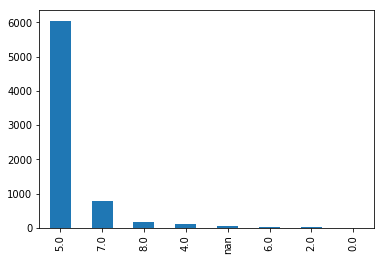

In [255]:
combi["Seats"].value_counts(dropna=False).plot(kind="bar")
combi["Seats"].fillna(value=5,inplace=True)

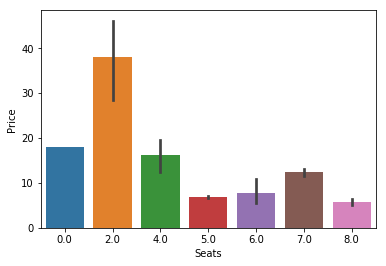

In [256]:
sns.barplot(x="Seats",y="Price",data=combi)

In [257]:
# Car with zero Seats has price value almost equals to car with 4 seats, replaicng zero with 4.

combi.loc[combi["Seats"]==0,"Seats"]=4

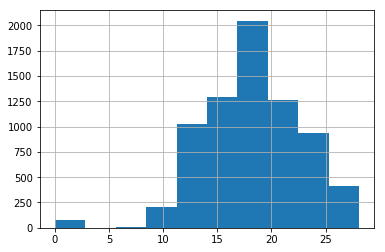

In [258]:
combi["Mileage"].hist()

In [259]:
combi.pivot_table(values="Mileage",index=["Fuel_Type_Num"], aggfunc="mean")

,Mileage
Fuel_Type_Num,
2.0,18.695833
3.0,24.128871
4.0,17.433374
5.0,18.629984


In [260]:
##### Imputing missing value in mileage grouping by brand name #####
combi['Mileage'] = combi['Mileage'].fillna(combi.groupby(['Brand_Name'])['Mileage'].transform('mean'))

In [261]:
combi["Mileage"].isnull().sum()

0

In [262]:
##### Imputing missing value in Engine grouping by brand name and fuel_type #####
combi["Engine"]=combi["Engine"].fillna(combi.groupby(["Brand_Name","Fuel_Type_Num"])["Engine"].transform("mean"))

In [263]:
### One missing value in engine imputing by brand_name only
combi['Engine'] = combi.groupby(['Brand_Name'])['Engine'].ffill()

In [264]:
combi["Power"]=combi["Power"].fillna(combi.groupby(["Brand_Name","Fuel_Type_Num"])["Power"].transform("mean"))

In [265]:
combi["Power"].isnull().sum()

3

In [266]:
### One missing value in Power imputing by Fuel_Type_Num only
combi['Power'] = combi.groupby(['Fuel_Type_Num'])['Power'].ffill()

In [267]:
#combi["Power"].isnull().sum()
combi

,Name,Location,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,temp,Fuel_Type_Num,Owner_Type_Num,Transmission_Num,Years_Usage,Tier_wise_class,Brand_Name,Indian_Brand
0,Maruti Wagon R LXI CNG,Mumbai,72000.0,26.60,998.0,58.16,5.0,1.75,train,3.0,4.0,1.0,9.0,2.0,Marut,1.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000.0,19.67,1582.0,126.20,5.0,12.50,train,5.0,4.0,1.0,4.0,1.0,Hyund,0.0
2,Honda Jazz V,Chennai,46000.0,18.20,1199.0,88.70,5.0,4.50,train,4.0,4.0,1.0,8.0,2.0,Honda,0.0
3,Maruti Ertiga VDI,Chennai,87000.0,20.77,1248.0,88.76,7.0,6.00,train,5.0,4.0,1.0,7.0,2.0,Marut,1.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670.0,15.20,1968.0,140.80,5.0,17.74,train,5.0,3.0,2.0,6.0,1.0,Audi,0.0
5,Hyundai EON LPG Era Plus Option,Hyderabad,75000.0,21.10,814.0,55.20,5.0,2.35,train,2.0,4.0,1.0,7.0,2.0,Hyund,0.0
6,Nissan Micra Diesel XV,Jaipur,86999.0,23.08,1461.0,63.10,5.0,3.50,train,5.0,4.0,1.0,6.0,1.0,Nissa,0.0
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,36000.0,11.36,2755.0,171.50,8.0,17.50,train,5.0,4.0,2.0,3.0,2.0,Toyot,0.0
8,Volkswagen Vento Diesel Comfortline,Pune,64430.0,20.54,1598.0,103.60,5.0,5.20,train,5.0,4.0,1.0,6.0,1.0,Volks,0.0
9,Tata Indica Vista Quadrajet LS,Chennai,65932.0,22.30,1248.0,74.00,5.0,1.95,train,5.0,3.0,1.0,7.0,2.0,Tata,1.0


In [268]:
dummy=pd.get_dummies(combi[["Location","Brand_Name"]])

In [269]:
combi=pd.concat([combi,dummy],axis=1)

In [270]:
combi.drop(["Name","Location","Brand_Name"],axis=1,inplace=True)

In [271]:
training=combi.loc[combi["temp"]=="train"]
testing=combi.loc[combi["temp"]=="test"]

In [272]:
training.drop(["temp"],axis=1,inplace=True)
testing.drop(["temp"],axis=1,inplace=True)
testing.drop(["Price"],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [273]:
from sklearn.model_selection import train_test_split

In [274]:
x_training= training.drop(["Price"],axis=1)
y_training=training["Price"]

In [275]:
x_train,x_test,y_train,y_test=train_test_split(x_training,y_training,test_size=0.25,random_state=43)

In [276]:
np.random.seed(324)

In [277]:
from xgboost.sklearn import XGBRegressor

In [278]:
clf= XGBRegressor(max_depth=10,learning_rate=.1, n_estimator=1000, verbosity=0,subsample=0.70,colsample_bytree=0.80, random_state=42)

In [279]:
clf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimator=1000,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=0.7, verbosity=0)

In [280]:
clf.predict(x_test)

array([12.724814 ,  2.4528198, 46.527237 , ...,  4.241923 , 42.22966  ,
        3.6445074], dtype=float32)

In [281]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [282]:
rmse=sqrt(mean_squared_error(y_test,clf.predict(x_test)))

In [283]:
rmse

2.178513365407076

In [284]:
Sample_submission["Price"]=clf.predict(testing)

In [286]:
Sample_submission.to_csv("D:/Python/Machine Hack/Used Car/Participants_Data_Used_Cars/Sample_submission.csv",header =True, index=False)